# Intro to dataframes

In [2]:
import pandas as pd

df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=["A", "B", "C"], index=['x','y','z'])

In [3]:
df

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


In [4]:
df.head(2) # head shows the top 5 lines or the number of lines you passed

,A,B,C
x,1,2,3
y,4,5,6


In [5]:
df.tail(1) # tail is the same as head, but from the bottom

,A,B,C
z,7,8,9


In [6]:
df.columns # returns the name of the columns

Index(['A', 'B', 'C'], dtype='object')

In [7]:
df.index # returns the name of the rows (index)

Index(['x', 'y', 'z'], dtype='object')

In [8]:
df.columns.tolist()
df.index.tolist() # tolist() gets the values into a list

['x', 'y', 'z']

In [9]:
df.info() # gives you info about your dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [10]:
df.describe() # returns a description of statistics of the data

,A,B,C
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [11]:
df.nunique() # returns how many unique values are in each column

A    3
B    3
C    3
dtype: int64

In [12]:
df.shape # returns n * m or row * columns lenght

(3, 3)

In [14]:
df.size # returns the total number of elements in the dataframe


9

In [15]:
df.dtypes # returns the data types of each column

A    int64
B    int64
C    int64
dtype: object

---

# Loading in Dataframes in Files

In [50]:
coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')

In [51]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [52]:
olympics_data = pd.read_excel('../../data/tutorials/olympics-data.xlsx') # using openpyxl

In [53]:
results = pd.read_parquet('../../data/tutorials/results.parquet') # using pyarrow

In [54]:
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')

In [55]:
bios.to_excel('../../data/tutorials/bios.xlsx') # converting csv data into an excel file

In [56]:
bios.to_parquet('../../data/tutorials/bios.parquet') # converting csv data into a parquet file

---

# Accessing Data with Pandas

In [57]:
coffee.sample(10, random_state=1) # returns random selected data
# we can pass random_state so it do not change the data in every run

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
7,Thursday,Latte,30
6,Thursday,Espresso,40
2,Tuesday,Espresso,30
10,Saturday,Espresso,45
4,Wednesday,Espresso,35
1,Monday,Latte,15
12,Sunday,Espresso,45
0,Monday,Espresso,25
13,Sunday,Latte,35


In [58]:
coffee.loc[0:3, ["Day", "Units Sold"]] # coffee.loc[rows, cols]: coffee.loc[[1,2,3]], coffee.loc[0:3], coffee.loc[[1,2,3], ["Day", "Units Sold]]
# returns the specified rows and columns

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20


In [59]:
coffee.iloc[0:3, [0, 2]] # returns the specified rows and columns using indexes
# notice that the upper bound is not included in iloc, but it is in loc

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30


In [60]:
coffee.index = coffee.Day # sets the rows' names from numbers to days
# We could have written 'coffee["Day"] also

In [61]:
coffee.head() # we could see that coffee.index is different now

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35


In [62]:
coffee.loc["Monday": "Wednesday", "Units Sold"] # now we can use the days strings to choose the rows

Day
Monday       25
Monday       15
Tuesday      30
Tuesday      20
Wednesday    35
Wednesday    25
Name: Units Sold, dtype: int64

In [63]:
coffee.iloc[0:2] # iloc keeps working the same way

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15


In [64]:
coffee.iloc[1, 2] = 10 # we can change one or multiple values ([1:3, 2]) like this

In [65]:
coffee.head() # row index 1 (Monday) and col index 2 (Units Sold) is now 10

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,10
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35


In [66]:
coffee.at["Monday", "Units Sold"] # gets a specific value

Day
Monday    25
Monday    10
Name: Units Sold, dtype: int64

In [67]:
coffee.iat[0,0] # gets a specific value by index

'Monday'

In [68]:
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=[1, 1]) # sort values by units sold and then by coffee type if some values are the same
# ascending is optional to describe the behavior of the sorting by index for the first list

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Latte,10
Tuesday,Tuesday,Latte,20
Monday,Monday,Espresso,25
Wednesday,Wednesday,Latte,25
Tuesday,Tuesday,Espresso,30
Thursday,Thursday,Latte,30
Wednesday,Wednesday,Espresso,35
Friday,Friday,Latte,35
Saturday,Saturday,Latte,35


In [69]:
for index, row in coffee.iterrows(): # we can iterate through coffee, but it loses some performance 
    print(index) # only use when it is necessary, otherwise use pandas built-in functions instead
    print(row)
    print("\n")

Monday
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: Monday, dtype: object


Monday
Day            Monday
Coffee Type     Latte
Units Sold         10
Name: Monday, dtype: object


Tuesday
Day             Tuesday
Coffee Type    Espresso
Units Sold           30
Name: Tuesday, dtype: object


Tuesday
Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: Tuesday, dtype: object


Wednesday
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: Wednesday, dtype: object


Wednesday
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: Wednesday, dtype: object


Thursday
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: Thursday, dtype: object


Thursday
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: Thursday, dtype: object


Friday
Day              Friday
Coffee Type    Espresso
Units Sold           45
Name: Friday, dtype: object


---

# Filtering Data

In [70]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [71]:
bios.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18
145499,149814,Bill Phillips,1913-07-15,Dulwich Hill,New South Wales,AUS,Australia,NaN,NaN,2003-10-20


In [72]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [73]:
bios.loc[bios['height_cm'] > 215, ['name', 'height_cm']] # we can use loc to filter data like this

,name,height_cm
5089,Viktor Pankrashkin,220.0
5583,Paulinho Villas Boas,217.0
5673,Gunther Behnke,221.0
5716,Uwe Blab,218.0
5781,Tommy Burleson,223.0
5796,Andy Campbell,218.0
6223,Lars Hansen,216.0
6270,Hu Zhangbao,216.0
6409,Sergey Kovalenko,216.0
6420,Jānis Krūmiņš,218.0


In [74]:
bios[bios['height_cm'] > 215][['name', 'height_cm']] # the same as the line before, but a short syntax version

,name,height_cm
5089,Viktor Pankrashkin,220.0
5583,Paulinho Villas Boas,217.0
5673,Gunther Behnke,221.0
5716,Uwe Blab,218.0
5781,Tommy Burleson,223.0
5796,Andy Campbell,218.0
6223,Lars Hansen,216.0
6270,Hu Zhangbao,216.0
6409,Sergey Kovalenko,216.0
6420,Jānis Krūmiņš,218.0


In [75]:
bios[(bios['height_cm'] > 215) & (bios['born_country'] == 'USA')] # the same as the line before, but a short syntax version

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,NaN
6937,6972,David Robinson,1965-08-06,Key West,Florida,USA,United States,216.0,107.0,NaN
123850,126093,Tyson Chandler,1982-10-02,Hanford,California,USA,United States,216.0,107.0,NaN


In [76]:
bios[bios['name'].str.contains('keith', case=False)] # search name col in bios with name containing the name keith (case=False is to ignore capitalization)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
...,...,...,...,...,...,...,...,...,...,...
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN
117676,119195,Duncan Keith,1983-07-16,Winnipeg,Manitoba,CAN,Canada,185.0,88.0,NaN
122121,124176,Keith Ferguson,1979-09-07,Sale,Victoria,AUS,Australia,176.0,78.0,NaN


In [77]:
bios[bios['name'].str.contains('keith|patrick', case=False)] # we can use regex syntax too like 'keith|patrick'
# if we want to make regex not possible to use we can add 'regex=False' property

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
6,7,Patrick Chila,1969-11-27,Ris-Orangis,Essonne,FRA,France,180.0,73.0,NaN
119,120,Patrick Wheatley,1899-01-20,Vryheid,KwaZulu-Natal,RSA,Great Britain,NaN,NaN,1967-11-05
319,320,Patrick De Koning,1961-04-23,Dendermonde,Oost-Vlaanderen,BEL,Belgium,178.0,92.0,NaN
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
2115,2125,Patrick Jopp,1962-01-08,NaN,NaN,NaN,Switzerland,176.0,67.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143975,147633,Patrick Chinyemba,2001-01-03,NaN,NaN,NaN,Zambia,NaN,NaN,NaN
144172,147850,Patrick Jakob,1996-10-17,Sankt Johann in Tirol,Tirol,AUT,Austria,NaN,NaN,NaN
144547,148239,Patrick Galbraith,1986-03-11,Haderslev,Syddanmark,DEN,Denmark,NaN,NaN,NaN
144565,148257,Patrick Russell,1993-01-04,Gentofte,Hovedstaden,DEN,Denmark,186.0,93.0,NaN


---

### Regular expressions to filter data

In [78]:
bios[bios['name'].str.contains(r'^a.*a$', case=False, regex=True, na=False)] # Find names starting with 'a' and ending with 'a'

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
254,255,Alan Budikusuma,1968-03-29,Surabaya,Jawa Timur,INA,Indonesia,178.0,71.0,NaN
267,268,Ardy Wiranata,1970-02-10,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia,171.0,67.0,NaN
271,272,Ambika Radhika,1973-05-17,NaN,NaN,NaN,India,NaN,NaN,NaN
419,420,Ascensión Guerra,1955-02-28,Madrid,Madrid,ESP,Spain,171.0,63.0,NaN
705,709,Andrea Vieira,1971-02-05,São Paulo,São Paulo,BRA,Brazil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145152,148869,Anna Vostrikova,2002-08-24,Rybinsk,Yaroslavl,RUS,ROC,NaN,NaN,NaN
145197,148915,Amy Baserga,2000-09-29,Zürich,Zürich,SUI,Switzerland,NaN,NaN,NaN
145334,149056,Anastasiya Shabotova,2006-01-17,Moskva (Moscow),Moskva,RUS,Ukraine,NaN,NaN,NaN
145448,149172,Aleksandra Glazkova,2006-03-15,Miass,Chelyabinsk,RUS,ROC,NaN,NaN,NaN


---

In [79]:
bios[bios['born_country'].isin(['USA', 'FRA', 'GBR']) & bios['name'].str.startswith('Jessie')] 

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
557,559,Jessie Wadworth,1863-11-12,Devizes,England,GBR,Great Britain,NaN,NaN,1936-07-08
28242,28454,Jessie Kite,1892-05-17,Hackney,England,GBR,Great Britain,NaN,NaN,1958-05-01
77203,77794,Jessie Cross,1909-04-14,New York,New York,USA,United States,NaN,NaN,1986-03-29
117711,119236,Jessie Vetter,1985-12-19,Madison,Wisconsin,USA,United States,173.0,70.0,NaN
126338,128689,Jessie Diggins,1991-08-26,Minneapolis,Minnesota,USA,United States,163.0,58.0,NaN


In [80]:
bios.query('born_country == "USA" and born_city == "Seattle"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
11030,11088,David Halpern,1955-08-18,Seattle,Washington,USA,United States,178.0,79.0,NaN
12800,12870,Todd Trewin,1958-04-20,Seattle,Washington,USA,United States,180.0,75.0,NaN
15476,15583,Scott McKinley,1968-10-15,Seattle,Washington,USA,United States,183.0,75.0,NaN
29079,29293,Joyce Tanac,1950-09-27,Seattle,Washington,USA,United States,156.0,49.0,NaN
31135,31371,Bill Kuhlemeier,1908-01-14,Seattle,Washington,USA,United States,NaN,NaN,2001-07-08
...,...,...,...,...,...,...,...,...,...,...
133392,136331,Hans Struzyna,1989-03-31,Seattle,Washington,USA,United States,188.0,91.0,NaN
135448,138662,Maude Davis Crossland,2003-03-19,Seattle,Washington,USA,Colombia,NaN,NaN,NaN
136993,140229,Jenell Berhorst,2003-12-13,Seattle,Washington,USA,United States,NaN,NaN,NaN
143507,147159,Nevin Harrison,2002-06-02,Seattle,Washington,USA,United States,175.0,73.0,NaN


---

# Adding / Removing Columns

In [81]:
import numpy as np
coffee['new_price'] = np.where(coffee['Coffee Type'] == 'Espresso', 3.99, 5.99) # creates a new column and gives the value of 3.99 to the Espresso coffe type and 5.99 for the other ones

In [82]:
coffee.drop("Monday") # it deletes the 'Monday' index rows temporarily

,Day,Coffee Type,Units Sold,new_price
Day,,,,
Tuesday,Tuesday,Espresso,30,3.99
Tuesday,Tuesday,Latte,20,5.99
Wednesday,Wednesday,Espresso,35,3.99
Wednesday,Wednesday,Latte,25,5.99
Thursday,Thursday,Espresso,40,3.99
Thursday,Thursday,Latte,30,5.99
Friday,Friday,Espresso,45,3.99
Friday,Friday,Latte,35,5.99
Saturday,Saturday,Espresso,45,3.99


In [83]:
coffee['price'] = 4.99

In [84]:
coffee.drop(columns=['price']) # eliminates price column temporarily

,Day,Coffee Type,Units Sold,new_price
Day,,,,
Monday,Monday,Espresso,25,3.99
Monday,Monday,Latte,10,5.99
Tuesday,Tuesday,Espresso,30,3.99
Tuesday,Tuesday,Latte,20,5.99
Wednesday,Wednesday,Espresso,35,3.99
Wednesday,Wednesday,Latte,25,5.99
Thursday,Thursday,Espresso,40,3.99
Thursday,Thursday,Latte,30,5.99
Friday,Friday,Espresso,45,3.99


In [85]:
coffee.drop(columns=['price'], inplace=True) # eliminates price column permanently

In [86]:
coffee = coffee.drop(columns=['price']) # this should work too

KeyError: "['price'] not found in axis"

In [ ]:
coffee = coffee[['Day', 'Coffee Type', 'Units Sold', 'new_price']] # this should work too

In [87]:
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price'] # we can create a new column with the values of another columns

In [88]:
coffee.rename(columns={'new_price': 'price'}) # this is temporary, if we want to make it permanently, we need to add 'inplace=True' or 'coffee = ...' just like we did with 'drop'

,Day,Coffee Type,Units Sold,price,revenue
Day,,,,,
Monday,Monday,Espresso,25,3.99,99.75
Monday,Monday,Latte,10,5.99,59.90
Tuesday,Tuesday,Espresso,30,3.99,119.70
Tuesday,Tuesday,Latte,20,5.99,119.80
Wednesday,Wednesday,Espresso,35,3.99,139.65
Wednesday,Wednesday,Latte,25,5.99,149.75
Thursday,Thursday,Espresso,40,3.99,159.60
Thursday,Thursday,Latte,30,5.99,179.70
Friday,Friday,Espresso,45,3.99,179.55


In [89]:
bios_new = bios.copy()

In [90]:
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]

In [91]:
bios_new.query('first_name == "Jessy"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
133613,136585,Jessy Trémoulière,1992-07-29,NaN,NaN,NaN,France,180.0,73.0,NaN,Jessy


In [92]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
 10  first_name    145500 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB


In [93]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'])

In [94]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     145500 non-null  int64         
 1   name           145500 non-null  object        
 2   born_date      143693 non-null  object        
 3   born_city      110908 non-null  object        
 4   born_region    110908 non-null  object        
 5   born_country   110908 non-null  object        
 6   NOC            145499 non-null  object        
 7   height_cm      106651 non-null  float64       
 8   weight_kg      102070 non-null  float64       
 9   died_date      33940 non-null   object        
 10  first_name     145500 non-null  object        
 11  born_datetime  143693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 13.3+ MB


In [95]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year

bios_new[['name', 'born_year']]

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0


In [98]:
bios_new.to_csv('../../data/tutorials/bios_new.csv', index=False)

In [99]:
bios_new['height_category'] = bios_new['height_cm'].apply(lambda x: "Short" if x < 165 else ("Average" if x < 185 else "Tall"))

bios_new[['name', 'height_cm', 'height_category']]

,name,height_cm,height_category
0,Jean-François Blanchy,NaN,Tall
1,Arnaud Boetsch,183.0,Average
2,Jean Borotra,183.0,Average
3,Jacques Brugnon,168.0,Average
4,Albert Canet,NaN,Tall
...,...,...,...
145495,Polina Luchnikova,167.0,Average
145496,Valeriya Merkusheva,168.0,Average
145497,Yuliya Smirnova,163.0,Short
145498,André Foussard,166.0,Average


In [100]:
def categorize_athlete(row):
    if row['height_cm'] < 175 or row['weight_kg'] <= 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    else:
        return 'Heavyweight'

bios['Category'] = bios.apply(categorize_athlete, axis=1) # axis = 1 is rows and axios = 0 is cols

In [101]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Heavyweight
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Lightweight
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Lightweight
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Lightweight
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,Lightweight


---

# Merging & Concatenating Data

In [104]:
nocs = pd.read_csv('../../data/tutorials/noc_regions.csv')

In [105]:
nocs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [106]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left', suffixes=['_bios', '_nocsdf'])

In [107]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_bios,height_cm,weight_kg,died_date,Category,NOC_nocsdf,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Middleweight,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Middleweight,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Lightweight,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Heavyweight,GBR,UK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Lightweight,RUS,Russia,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Lightweight,RUS,Russia,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Lightweight,RUS,Russia,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,Lightweight,FRA,France,NaN


In [108]:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

In [109]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_bios,height_cm,weight_kg,died_date,Category,NOC_nocsdf,born_country_full,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Middleweight,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Middleweight,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Lightweight,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Heavyweight,GBR,UK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Lightweight,RUS,Russia,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Lightweight,RUS,Russia,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Lightweight,RUS,Russia,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,Lightweight,FRA,France,NaN


In [110]:
bios_new[bios_new['NOC_bios'] != bios_new['region']][['name', 'NOC_bios', 'region']]

KeyError: 'region'

In [111]:
usa = bios[bios['born_country'] == 'USA'].copy()
gbr = bios[bios['born_country'] == 'GBR'].copy()

In [112]:
new_df = pd.concat([usa, gbr])

In [113]:
new_df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,Category
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN,Lightweight
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN,Lightweight
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN,Lightweight
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20,Heavyweight
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN,Lightweight
...,...,...,...,...,...,...,...,...,...,...,...
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN,Heavyweight
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN,Heavyweight
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN,Middleweight
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN,Heavyweight


In [114]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


In [115]:
combined_df = pd.merge(results, bios, on='athlete_id', how='left')

In [116]:
combined_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,...,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,Category
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,...,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,...,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,...,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,...,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,...,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight


---

# Handling Null Values

In [117]:
coffee

,Day,Coffee Type,Units Sold,new_price,revenue
Day,,,,,
Monday,Monday,Espresso,25,3.99,99.75
Monday,Monday,Latte,10,5.99,59.90
Tuesday,Tuesday,Espresso,30,3.99,119.70
Tuesday,Tuesday,Latte,20,5.99,119.80
Wednesday,Wednesday,Espresso,35,3.99,139.65
Wednesday,Wednesday,Latte,25,5.99,149.75
Thursday,Thursday,Espresso,40,3.99,159.60
Thursday,Thursday,Latte,30,5.99,179.70
Friday,Friday,Espresso,45,3.99,179.55


In [118]:
coffee.loc[[0,1], 'Units Sold'] = np.nan # we can set values to NaN like this

KeyError: "None of [Index([0, 1], dtype='object', name='Day')] are in the [index]"

In [119]:
coffee.head() # values 0, 1 are now NaN
coffee.isna().sum() # we can check how many NaN values are in each column

Day            0
Coffee Type    0
Units Sold     0
new_price      0
revenue        0
dtype: int64

In [120]:
coffee.fillna(coffee['Units Sold'].mean(), inplace=True) # we can fill NaN values with the mean of the column
coffee.head()

,Day,Coffee Type,Units Sold,new_price,revenue
Day,,,,,
Monday,Monday,Espresso,25,3.99,99.75
Monday,Monday,Latte,10,5.99,59.90
Tuesday,Tuesday,Espresso,30,3.99,119.70
Tuesday,Tuesday,Latte,20,5.99,119.80
Wednesday,Wednesday,Espresso,35,3.99,139.65


In [121]:
coffee.loc[[2,3], 'Units Sold'] = np.nan # we can set values to NaN like this
coffee['Units Sold'].interpolate() # we can use interpolate to fill NaN values

KeyError: "None of [Index([2, 3], dtype='object', name='Day')] are in the [index]"

In [122]:
coffee.loc[[2,3], 'Units Sold'] = np.nan # we can set values to NaN like this
coffee.dropna(subset=['Units Sold'], inplace=True) # we can drop NaN values like this
coffee.head()

KeyError: "None of [Index([2, 3], dtype='object', name='Day')] are in the [index]"

In [123]:
coffee[coffee['Units Sold'].isna()] # we can check if there are any NaN values in the column
coffee[coffee['Units Sold'].notna()] # we can check if there are any NaN values in the column

,Day,Coffee Type,Units Sold,new_price,revenue
Day,,,,,
Monday,Monday,Espresso,25,3.99,99.75
Monday,Monday,Latte,10,5.99,59.90
Tuesday,Tuesday,Espresso,30,3.99,119.70
Tuesday,Tuesday,Latte,20,5.99,119.80
Wednesday,Wednesday,Espresso,35,3.99,139.65
Wednesday,Wednesday,Latte,25,5.99,149.75
Thursday,Thursday,Espresso,40,3.99,159.60
Thursday,Thursday,Latte,30,5.99,179.70
Friday,Friday,Espresso,45,3.99,179.55


---

# Aggregating Data

In [124]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Heavyweight


In [125]:
bios['born_city'].value_counts() # we can check how many times each value appears in the column

born_city
Budapest            1378
Moskva (Moscow)      883
Oslo                 708
Stockholm            629
Praha (Prague)       600
                    ... 
Roth                   1
Romoos                 1
Dva Polya Artash       1
Dulwich Hill           1
Visé                   1
Name: count, Length: 22368, dtype: int64

In [126]:
bios[bios['born_country'] == 'USA']['born_region'].value_counts().tail(25) # we can check how many times each value appears in the column, but only for the USA

born_region
Utah              91
Missouri          91
North Carolina    86
Arizona           83
New Hampshire     83
Vermont           68
Mississippi       66
Alabama           64
Kentucky          62
Tennessee         62
Nebraska          60
Rhode Island      56
Montana           55
Maine             50
South Carolina    50
Alaska            45
Arkansas          42
Idaho             41
New Mexico        38
Nevada            36
South Dakota      27
West Virginia     24
Delaware          22
North Dakota      16
Wyoming           14
Name: count, dtype: int64

In [127]:
coffee['Units Sold'] = coffee['Units Sold'].interpolate() # we can use interpolate to fill NaN values

In [128]:
coffee.groupby('Coffee Type')['Units Sold'].sum() # we can group by a column and sum the values of another column

Coffee Type
Espresso    265
Latte       190
Name: Units Sold, dtype: int64

In [129]:
coffee.groupby('Coffee Type')['Units Sold'].mean() # we can group by a column and get the mean of the values of another column

Coffee Type
Espresso    37.857143
Latte       27.142857
Name: Units Sold, dtype: float64

In [130]:
coffee.groupby(['Coffee Type', 'Day']).agg({'Units Sold': 'sum', 'price': 'mean'}) # we can group by a column and get the mean of the values of another column, but we can also use agg to get multiple values at once)

ValueError: 'Day' is both an index level and a column label, which is ambiguous.

In [131]:
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='Units Sold') # we can use pivot to create a pivot table
pivot # pivot table is a table that summarizes data from another table

Coffee Type,Espresso,Latte
Day,,
Friday,45,35
Monday,25,10
Saturday,45,35
Sunday,45,35
Thursday,40,30
Tuesday,30,20
Wednesday,35,25


In [132]:
pivot.loc['Monday', 'Latte'] # we can access the values of the pivot table like this

np.int64(10)

In [133]:
pivot.sum() # we can sum the values of the pivot table like this
pivot.sum(axis=1) # we can sum the values of the pivot table like this, but by rows

Day
Friday       80
Monday       35
Saturday     80
Sunday       80
Thursday     70
Tuesday      50
Wednesday    60
dtype: int64

In [134]:
bios['born_date'] = pd.to_datetime(bios['born_date']) # we can convert the column to datetime format
bios['month_born'] = bios['born_date'].dt.month # we can get the month from the date
bios['year_born'] = bios['born_date'].dt.year # we can get the year from the date
bios.groupby([bios['year_born'], bios['month_born']])['name'].count().reset_index().sort_values('name', ascending=False) # we can group by a column and get the count of the values of another column, but we can also use reset_index to get the values in a new dataframe

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1629,1986.0,1.0,227
1497,1975.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
51,1852.0,5.0,1
52,1852.0,6.0,1
1882,2008.0,7.0,1
1883,2008.0,8.0,1


---

# Advanced Functionality

In [135]:
# .shift() .rank() .rolling()

In [136]:
coffee['yesterday_revenue'] = coffee['revenue'].shift(2) # we can use shift to get the value of the previous row

In [137]:
coffee['pct_change'] = coffee['revenue'] / coffee['yesterday_revenue'] * 100 # we can use pct_change to get the percentage change of the values

In [138]:
coffee

,Day,Coffee Type,Units Sold,new_price,revenue,yesterday_revenue,pct_change
Day,,,,,,,
Monday,Monday,Espresso,25,3.99,99.75,NaN,NaN
Monday,Monday,Latte,10,5.99,59.90,NaN,NaN
Tuesday,Tuesday,Espresso,30,3.99,119.70,99.75,120.000000
Tuesday,Tuesday,Latte,20,5.99,119.80,59.90,200.000000
Wednesday,Wednesday,Espresso,35,3.99,139.65,119.70,116.666667
Wednesday,Wednesday,Latte,25,5.99,149.75,119.80,125.000000
Thursday,Thursday,Espresso,40,3.99,159.60,139.65,114.285714
Thursday,Thursday,Latte,30,5.99,179.70,149.75,120.000000
Friday,Friday,Espresso,45,3.99,179.55,159.60,112.500000


In [139]:
bios['height_rank'] = bios['height_cm'].rank(ascending=False) # we can use rank to get the rank of the values

In [140]:
bios.sort_values('height_rank').sample(10)[['name', 'height_rank']] # we can sort the values by rank and get a sample of 10 values
# sample is used to get a random sample of the values

,name,height_rank
2814,Byron Black,58380.5
12672,Takeshi Shirai,83975.0
12626,Fernando Sarasola,46966.0
101032,Intars Dīcmanis,2609.0
35526,Henrique Camargo,NaN
42429,"Elemér, Sir Bömches von Boor",NaN
137281,Madison Ashby,91849.5
32346,Robert Licu,NaN
58058,Ioannis Farmakidis,98114.5
96681,Vladimir Shadrin,38677.0


In [141]:
coffee['cumulative_revenue'] = coffee['revenue'].cumsum() # we can use cumsum to get the cumulative sum of the values
coffee

,Day,Coffee Type,Units Sold,new_price,revenue,yesterday_revenue,pct_change,cumulative_revenue
Day,,,,,,,,
Monday,Monday,Espresso,25,3.99,99.75,NaN,NaN,99.75
Monday,Monday,Latte,10,5.99,59.90,NaN,NaN,159.65
Tuesday,Tuesday,Espresso,30,3.99,119.70,99.75,120.000000,279.35
Tuesday,Tuesday,Latte,20,5.99,119.80,59.90,200.000000,399.15
Wednesday,Wednesday,Espresso,35,3.99,139.65,119.70,116.666667,538.80
Wednesday,Wednesday,Latte,25,5.99,149.75,119.80,125.000000,688.55
Thursday,Thursday,Espresso,40,3.99,159.60,139.65,114.285714,848.15
Thursday,Thursday,Latte,30,5.99,179.70,149.75,120.000000,1027.85
Friday,Friday,Espresso,45,3.99,179.55,159.60,112.500000,1207.40


In [142]:
latte = coffee[coffee['Coffee Type']=='Latte'].copy() # we can create a new dataframe with the values of the original dataframe
latte['3day'] = latte['revenue'].rolling(3).sum() # rolling values are used to get the values of the previous rows
latte

,Day,Coffee Type,Units Sold,new_price,revenue,yesterday_revenue,pct_change,cumulative_revenue,3day
Day,,,,,,,,,
Monday,Monday,Latte,10,5.99,59.90,NaN,NaN,159.65,NaN
Tuesday,Tuesday,Latte,20,5.99,119.80,59.90,200.000000,399.15,NaN
Wednesday,Wednesday,Latte,25,5.99,149.75,119.80,125.000000,688.55,329.45
Thursday,Thursday,Latte,30,5.99,179.70,149.75,120.000000,1027.85,449.25
Friday,Friday,Latte,35,5.99,209.65,179.70,116.666667,1417.05,539.10
Saturday,Saturday,Latte,35,5.99,209.65,209.65,100.000000,1806.25,599.00
Sunday,Sunday,Latte,35,5.99,209.65,209.65,100.000000,2195.45,628.95


### pyarrow is the new default engine for reading/writing Parquet and some other formats in pandas 2.0+, offering better performance and compatibility than the older numpy-based engine.
To use `pyarrow` with pandas for reading and writing Parquet files:

```python
import pyarrow as pa
import pyarrow.parquet as pq

# Save a DataFrame to Parquet using pyarrow (pandas uses pyarrow by default if installed)
bios.to_parquet('bios.parquet', engine='pyarrow')

# Read a Parquet file using pyarrow
df_loaded = pd.read_parquet('bios.parquet', engine='pyarrow')
df_loaded.head()
```

In [143]:
# This is the way to use terminal commands in jupyter notebook directly
# !pip install matplotlib 

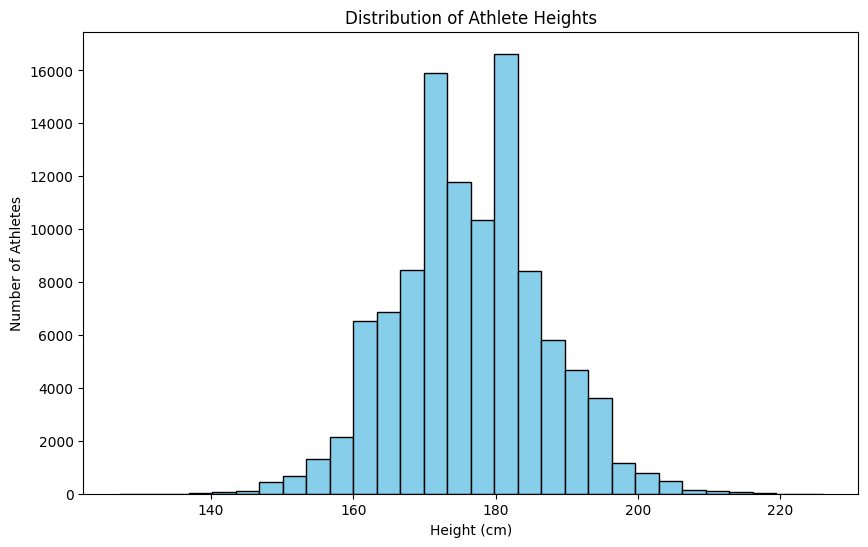

In [144]:
import matplotlib.pyplot as plt

# Filter out rows with missing height values
heights = bios['height_cm'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(heights, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.show()